In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
conda install -c conda-forge scikit-plot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install yfinance
!pip install investpy
!pip install pykrx
!pip install seaborn
!pip install workalendar
!pip install --upgrade finance-datareader

In [4]:
!pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl

Processing c:\users\user\downloads\ta_lib-0.4.19-cp38-cp38-win_amd64.whl
TA-Lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [5]:
pip install -U finance-datareader

In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 크롤링 start_date, end_date
start_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : 2017-01-01
YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : 2021-01-13


In [8]:
# 데이터 수집기간 입력
# yahoo finance 양식, ex) yyyy-mm-dd
#start_date = '2018-01-01'
#end_date = '2020-10-13'

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [9]:
# 주요 3개국 대비 원 환율

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)

# NASDAQ
nasdaq_ = yf.download("^IXIC", start=start_date, end=end_date)
nasdaq_.columns = ['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Close','nasdaq_Adj Close','nasdaq_Volume']
nasdaq_ = nasdaq_.drop(['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Adj Close','nasdaq_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_samsung['macd'] = macd
model_samsung['macdsignal9'] = macdsignal9
model_samsung['macdhist'] = macdhist

MSCI_KR = fdr.DataReader('156080', start_date,end_date) #MSCI KOREA
MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
MSCI_KR.columns = ['MSCI_KR']

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# 미국 국채 수익률 (10년)
treasury_10y_ = yf.download("^TNX", start=start_date, end=end_date)
treasury_10y_.columns = ['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Close','treasury_10y_Adj Close','treasury_10y_Volume']
treasury_10y_ = treasury_10y_.drop(['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Adj Close','treasury_10y_Volume'], axis=1)

# 미국 국채 수익률 (30년)
treasury_30y_ = yf.download("^TYX", start=start_date, end=end_date)
treasury_30y_.columns = ['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Close','treasury_30y_Adj Close','treasury_30y_Volume']
treasury_30y_ = treasury_30y_.drop(['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Adj Close','treasury_30y_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
# SOX 지수
SOX = yf.download("^SOX", start=start_date, end=end_date)
SOX.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOX = SOX.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed


In [11]:
SOX

,SOXX_Close
Date,
2017-01-03,907.340027
2017-01-04,909.770020
2017-01-05,901.690002
2017-01-06,908.650024
2017-01-09,918.580017
...,...
2021-01-06,2827.959961
2021-01-07,2937.000000
2021-01-08,2936.469971


In [12]:
model_samsung['US'] = exchange_rate_usd_
model_samsung['SNP500'] = snp_500_
model_samsung['RUSSELL2000'] = russell_2000_
model_samsung['NASDAQ'] = nasdaq_
model_samsung['MSCI_KR'] = MSCI_KR
model_samsung['SOX'] = SOX
model_samsung['TREASURY_5Y']=treasury_5y_
model_samsung['TREASURY_10Y']=treasury_10y_
model_samsung['TREASURY_30Y']=treasury_30y_

In [13]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거

In [14]:
model_samsung = model_samsung.drop(['Open','High','Low','Volume'],axis=1)

In [15]:
model_samsung

,Close,macd,macdsignal9,macdhist,US,SNP500,RUSSELL2000,NASDAQ,MSCI_KR,SOX,TREASURY_5Y,TREASURY_10Y,TREASURY_30Y
날짜,,,,,,,,,,,,,
2017-02-21,38940,367.981524,569.998712,-202.017188,1142.89,2365.379883,1410.339966,5865.950195,11626,990.440002,1.917,2.427,3.037
2017-02-22,39300,412.522500,538.503469,-125.980969,1138.48,2362.820068,1403.859985,5860.629883,11611,990.070007,1.912,2.418,3.037
2017-02-23,39180,433.145516,517.431878,-84.286363,1133.10,2363.810059,1394.619995,5835.509766,11665,973.869995,1.878,2.388,3.023
2017-02-24,38220,367.785821,487.502667,-119.716846,1130.50,2367.340088,1394.520020,5845.310059,11504,973.440002,1.804,2.317,2.955
2017-02-27,38060,299.623259,449.926785,-150.303527,1134.65,2369.750000,1407.969971,5861.899902,11442,982.400024,1.870,2.369,2.986
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06,82200,3861.483796,3250.585248,610.898548,1087.93,3748.139893,2057.919922,12740.790039,19550,2827.959961,0.432,1.042,1.821
2021-01-07,82900,3915.864554,3383.641109,532.223444,1094.28,3803.790039,2096.889893,13067.480469,19985,2937.000000,0.454,1.071,1.845
2021-01-08,88800,4384.500594,3583.813006,800.687588,1092.93,3824.679932,2091.659912,13201.980469,20990,2936.469971,0.479,1.105,1.863


In [16]:
returns = pd.DataFrame()

In [17]:
tickers = ['Close', 'US', 'SNP500', 'RUSSELL2000', 'NASDAQ','MSCI_KR','SOX','TREASURY_5Y']

for tick in tickers :
    returns[tick + ' Return'] = model_samsung[tick].pct_change() ## 각 항목들의 수익률을 계산한다.

returns.head()

,Close Return,US Return,SNP500 Return,RUSSELL2000 Return,NASDAQ Return,MSCI_KR Return,SOX Return,TREASURY_5Y Return
날짜,,,,,,,,
2017-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-22,0.009245,-0.003859,-0.001082,-0.004595,-0.000907,-0.001290,-0.000374,-0.002608
2017-02-23,-0.003053,-0.004726,0.000419,-0.006582,-0.004286,0.004651,-0.016362,-0.017782
2017-02-24,-0.024502,-0.002295,0.001493,-0.000072,0.001679,-0.013802,-0.000442,-0.039404
2017-02-27,-0.004186,0.003671,0.001018,0.009645,0.002838,-0.005389,0.009204,0.036585


Text(0.5, 1.0, 'TREASURY_5Y')

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


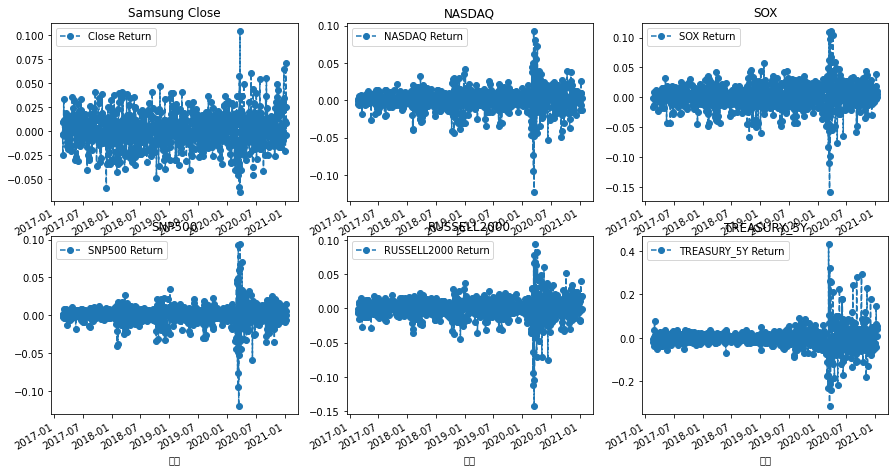

In [18]:
# Then we'll plot the daily return percentage
pct_index = ['Close Return', 'US Return', 'SNP500 Return', 'RUSSELL2000 Return','NASDAQ Return', 'MSCI_KR Return', 'SOX Return', 'TREASURY_5Y Return']
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)

returns['Close Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Samsung Close')

returns['NASDAQ Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('NASDAQ')

returns['SOX Return'].plot(ax=axes[0,2], legend=True, linestyle='--', marker='o')
axes[0,2].set_title('SOX')

returns['SNP500 Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('SNP500')

returns['RUSSELL2000 Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('RUSSELL2000')

returns['TREASURY_5Y Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title('TREASURY_5Y')


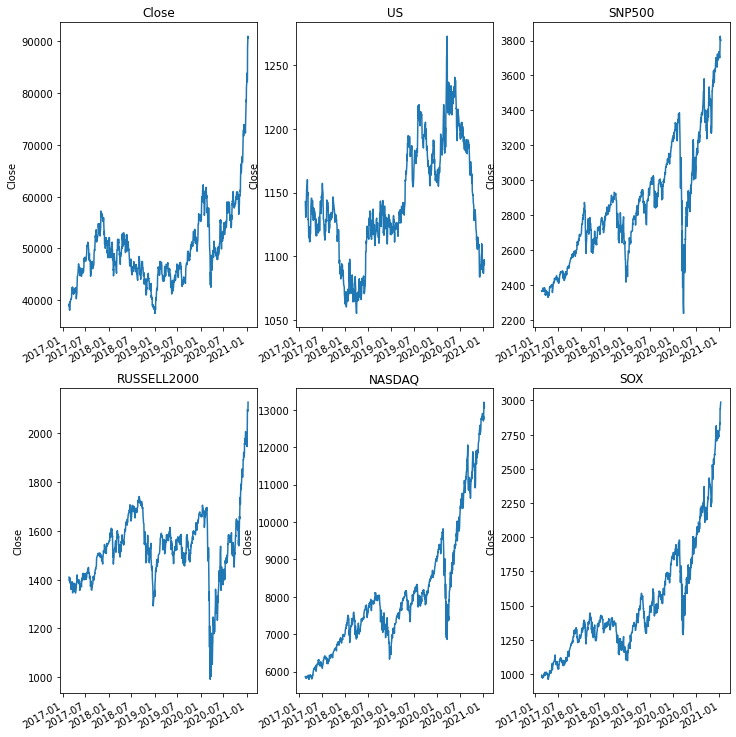

In [19]:
# Let's see a historical view of the closing price
index = ['Close', 'US', 'SNP500', 'RUSSELL2000', 'NASDAQ','SOX']

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=2.0, bottom=1.2)

for i, company in enumerate(index, 1):
    plt.subplot(3, 3, i)
    model_samsung[company].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(company)

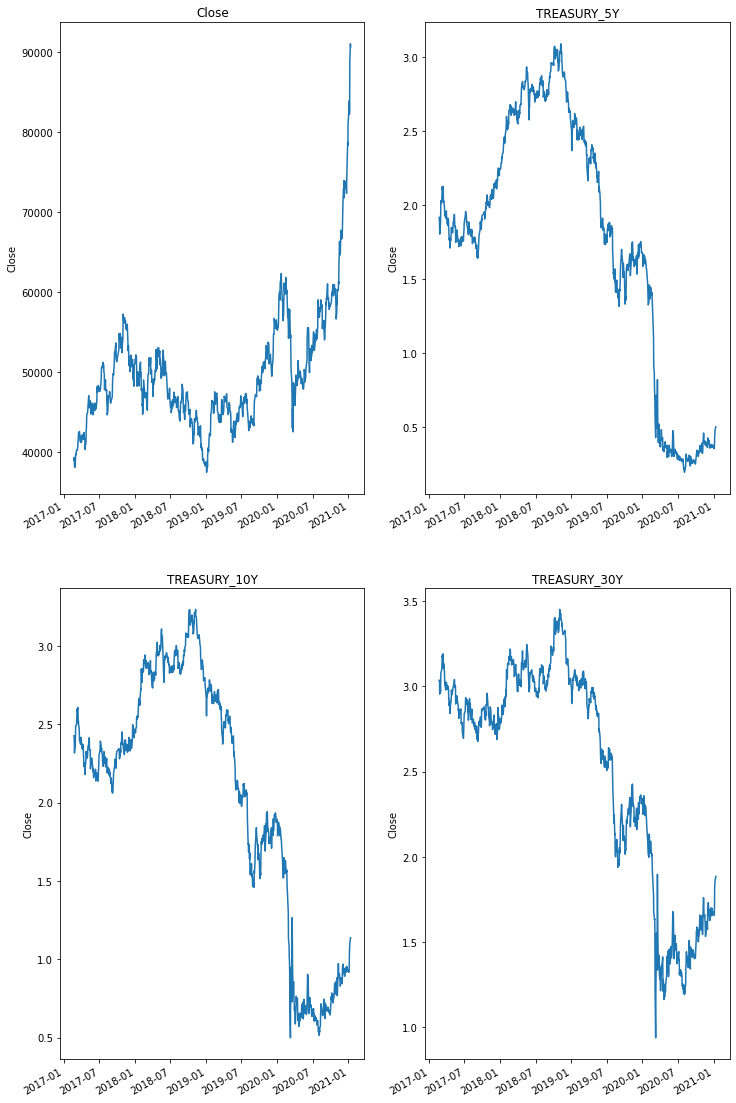

In [20]:
# Let's see a historical view of the closing price
index2 = ['Close', 'TREASURY_5Y', 'TREASURY_10Y', 'TREASURY_30Y']

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=2.0, bottom=1.2)

for i, company in enumerate(index2, 1):
    plt.subplot(2, 2, i)
    model_samsung[company].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(company)

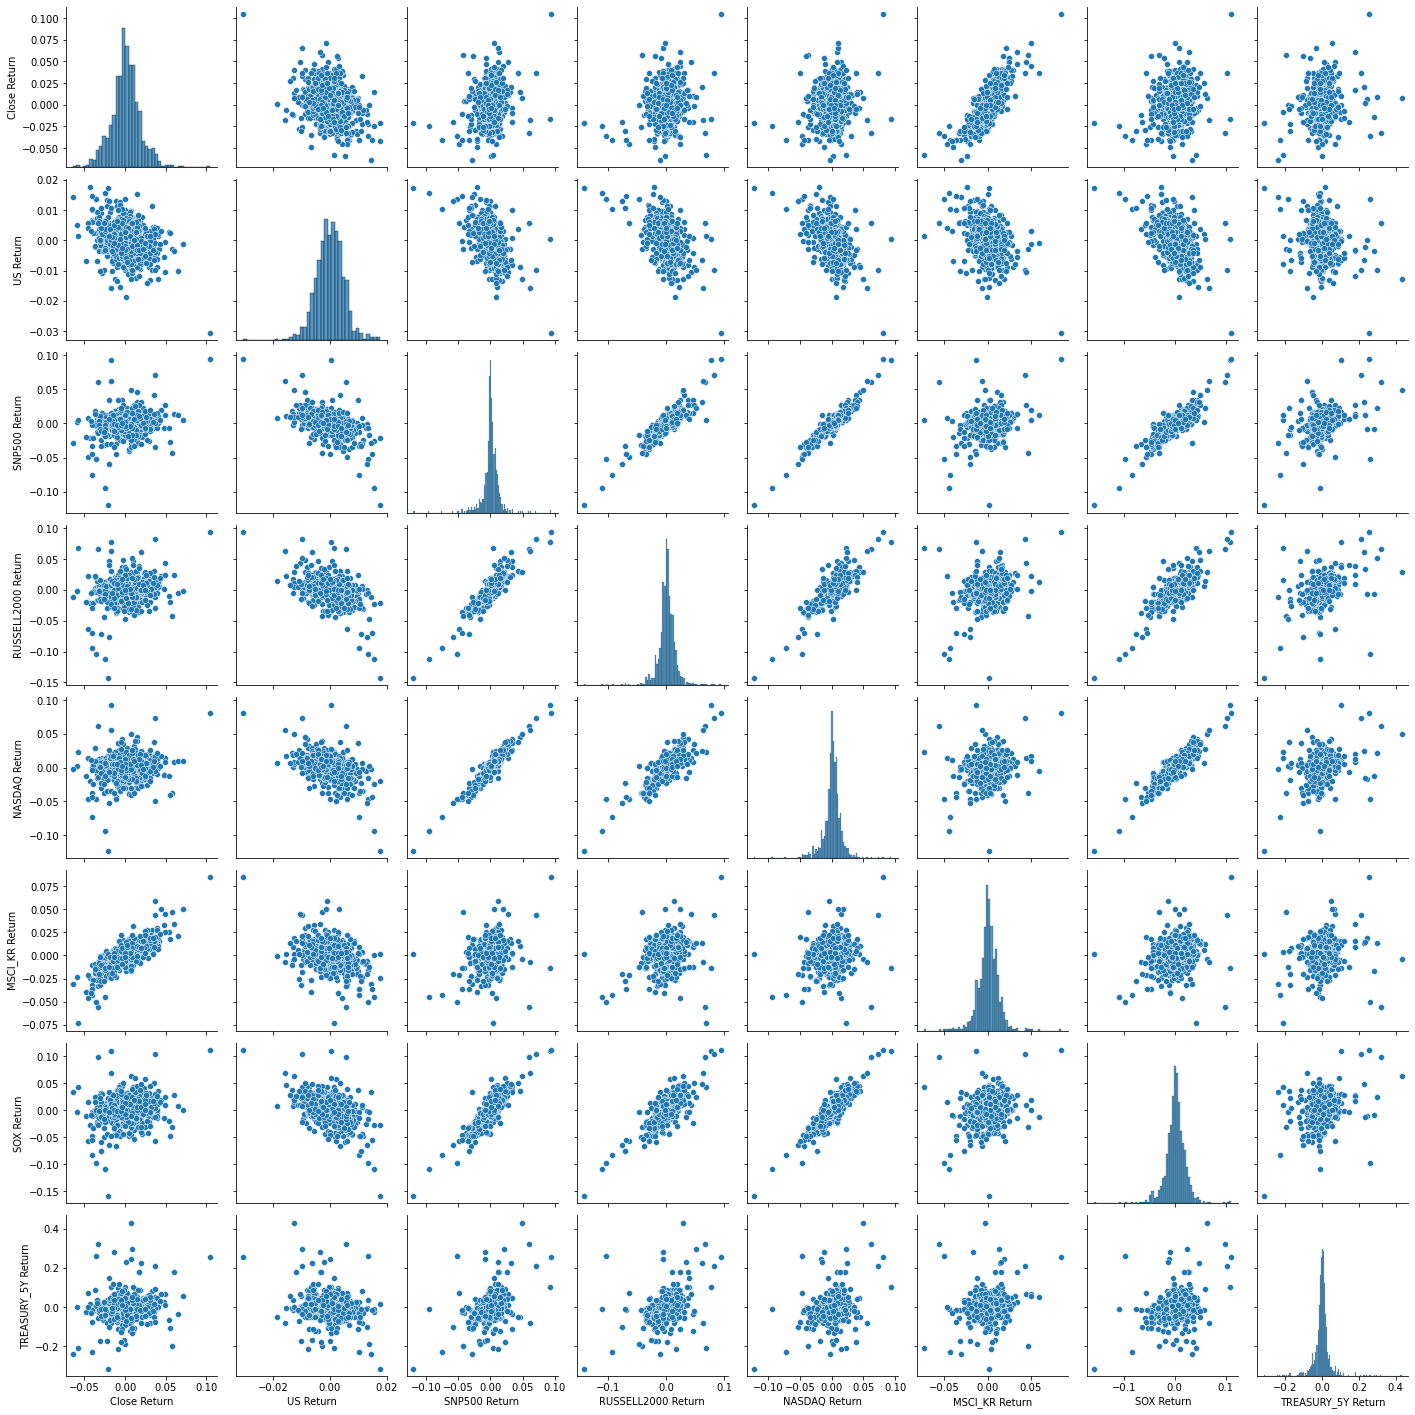

In [21]:
import seaborn as sns
sns.pairplot(returns[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행

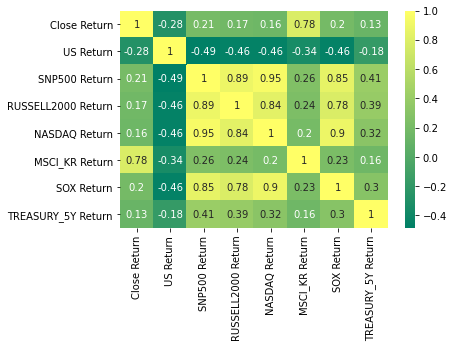

In [22]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(returns.corr(), annot=True, cmap='summer')

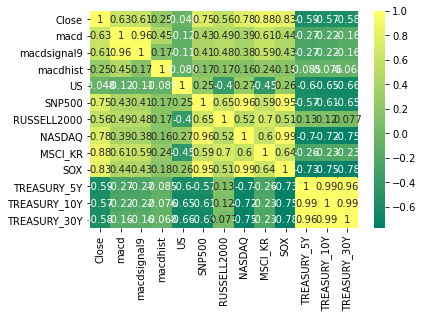

In [23]:
sns.heatmap(model_samsung.corr(), annot=True, cmap='summer')

In [24]:
# Worst Drop (3 of them on Inauguration day)
returns.idxmin()

Close Return         2020-03-23
US Return            2020-03-24
SNP500 Return        2020-03-16
RUSSELL2000 Return   2020-03-16
NASDAQ Return        2020-03-16
MSCI_KR Return       2020-03-19
SOX Return           2020-03-16
TREASURY_5Y Return   2020-03-16
dtype: datetime64[ns]

In [25]:
# Best Single Day Gain
returns.idxmax()

Close Return         2020-03-24
US Return            2018-02-02
SNP500 Return        2020-03-24
RUSSELL2000 Return   2020-03-24
NASDAQ Return        2020-03-13
MSCI_KR Return       2020-03-24
SOX Return           2020-03-24
TREASURY_5Y Return   2020-03-10
dtype: datetime64[ns]

In [26]:
returns.std()


Close Return          0.017762
US Return             0.004908
SNP500 Return         0.013402
RUSSELL2000 Return    0.016638
NASDAQ Return         0.014745
MSCI_KR Return        0.012040
SOX Return            0.020700
TREASURY_5Y Return    0.049995
dtype: float64

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


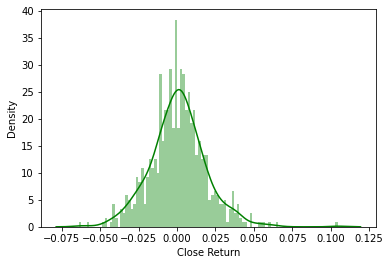

In [27]:
sns.distplot(returns.loc['2018-01-03':'2021-01-07']['Close Return'],color='green',bins=100)

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


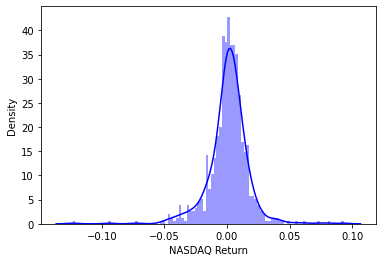

In [28]:
sns.distplot(returns.loc['2018-01-03':'2021-01-07']['NASDAQ Return'],color='blue',bins=100)

In [29]:
!pip install cufflinks

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 51676 missing from current font.



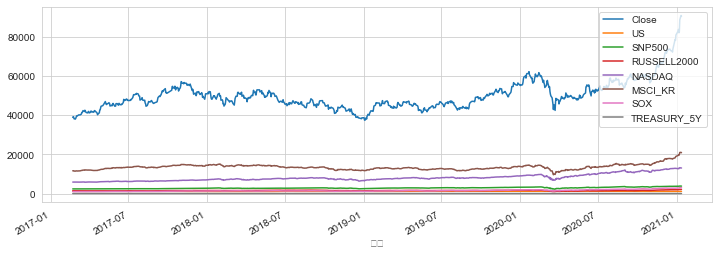

In [31]:
for tick in tickers:
    model_samsung[tick].plot(figsize=(12,4),label=tick)
plt.legend()

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 51676 missing from current font.



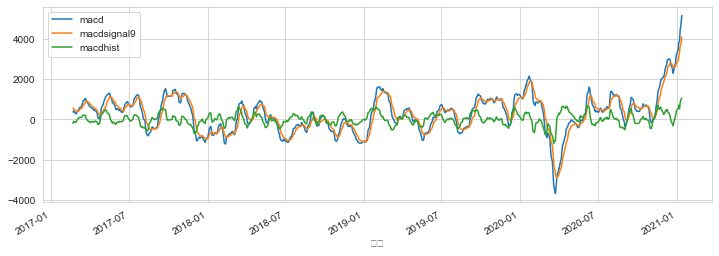

In [32]:
macd_list=['macd','macdsignal9','macdhist']

for tick in macd_list:
    model_samsung[tick].plot(figsize=(12,4),label=tick)
plt.legend()


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 51676 missing from current font.



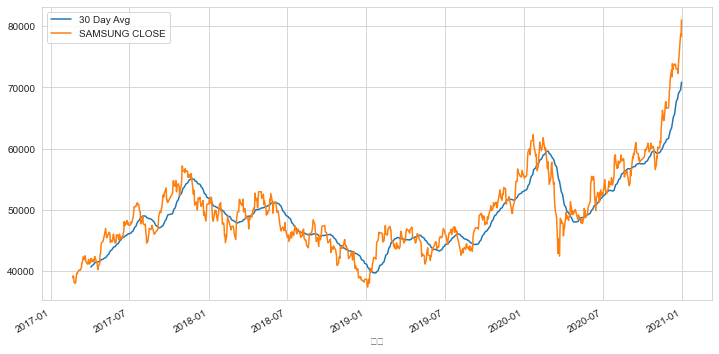

In [33]:
plt.figure(figsize=(12,6))
model_samsung['Close'].loc['2008-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
model_samsung['Close'].loc['2008-01-01':'2021-01-01'].plot(label='SAMSUNG CLOSE')
plt.legend()

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 51676 missing from current font.



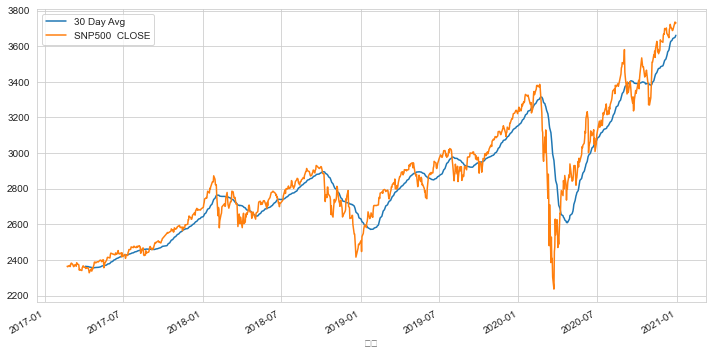

In [34]:
plt.figure(figsize=(12,6))
model_samsung['SNP500'].loc['2008-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
model_samsung['SNP500'].loc['2008-01-01':'2021-01-01'].plot(label='SNP500  CLOSE')
plt.legend()

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 51676 missing from current font.



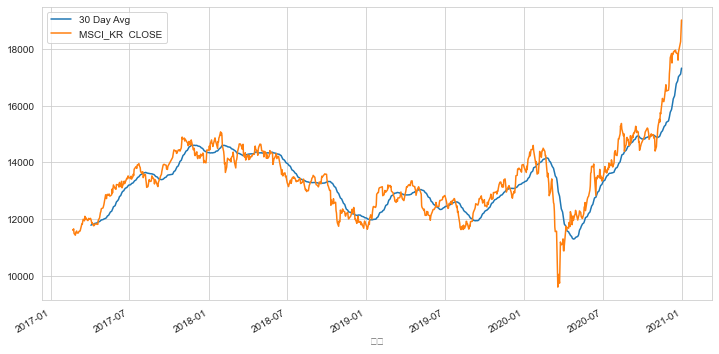

In [35]:
plt.figure(figsize=(12,6))
model_samsung['MSCI_KR'].loc['2008-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
model_samsung['MSCI_KR'].loc['2008-01-01':'2021-01-01'].plot(label='MSCI_KR  CLOSE')
plt.legend()

In [36]:
model_samsung['Close'].loc['2018-01-01':'2021-01-01'].ta_plot(study='boll')